# Time-Series Forecasting of Avocado Prices using FBProphet

# Problem Statement

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')

# Exploratory Data Analysis

In [3]:
# Let's view the dataset
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
avocado_df["Date"] = pd.to_datetime(avocado_df["Date"])

In [5]:
avocado_df = avocado_df.sort_values("Date")
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


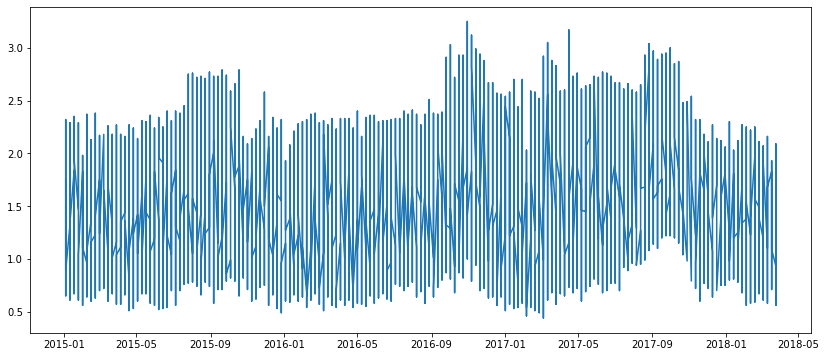

In [6]:
plt.figure(figsize=(14,6))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

In [7]:
# Count number of regions 
avocado_df['region'].value_counts()

Syracuse               338
Indianapolis           338
Roanoke                338
Southeast              338
West                   338
LasVegas               338
NewOrleansMobile       338
California             338
TotalUS                338
Denver                 338
PhoenixTucson          338
Plains                 338
GrandRapids            338
RaleighGreensboro      338
StLouis                338
Chicago                338
Portland               338
MiamiFtLauderdale      338
Houston                338
Seattle                338
Detroit                338
Boise                  338
Sacramento             338
Pittsburgh             338
LosAngeles             338
BuffaloRochester       338
NorthernNewEngland     338
HartfordSpringfield    338
Jacksonville           338
Tampa                  338
DallasFtWorth          338
RichmondNorfolk        338
Boston                 338
SouthCentral           338
Charlotte              338
SouthCarolina          338
SanFrancisco           338
A

In [8]:
# Count number of years 
avocado_df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [9]:
# Count number of types 
avocado_df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [10]:
# Check for missing data
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

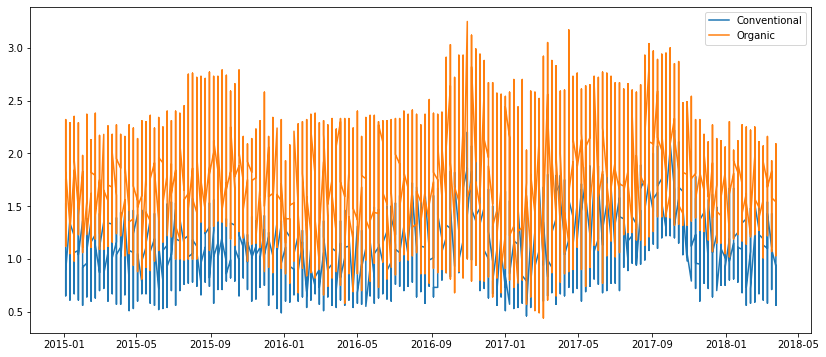

In [11]:
plt.figure(figsize=(14,6))
plt.plot(avocado_df['Date'][avocado_df['type']=='conventional'], avocado_df['AveragePrice'][avocado_df['type']=='conventional'])
plt.plot(avocado_df['Date'][avocado_df['type']=='organic'], avocado_df['AveragePrice'][avocado_df['type']=='organic'])
plt.legend(['Conventional','Organic'])

In [12]:
avocado_conv = avocado_df[['Date', 'AveragePrice']][avocado_df['type']=='conventional']
avocado_org = avocado_df[['Date', 'AveragePrice']][avocado_df['type']=='organic']

In [13]:
avocado_org

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
9333,2015-01-04,1.64
10269,2015-01-04,1.50
...,...,...
17841,2018-03-25,1.75
18057,2018-03-25,1.42
17649,2018-03-25,1.74
18141,2018-03-25,1.42


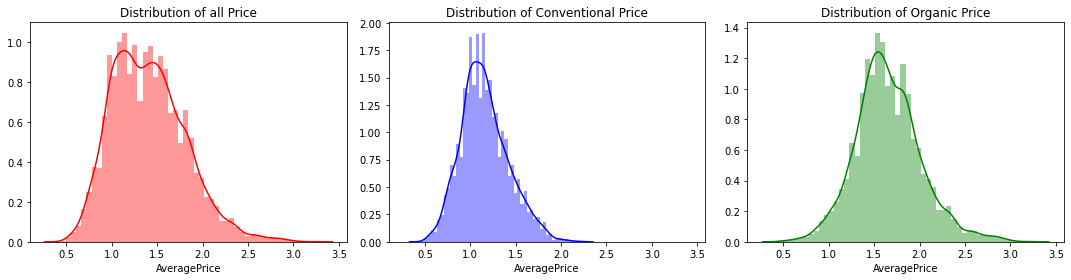

In [14]:
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
sns.distplot(avocado_df["AveragePrice"], color = 'r', ax=axes[0])
axes[0].set_title('Distribution of all Price')

sns.distplot(avocado_conv["AveragePrice"], color = 'b', ax=axes[1])
axes[1].set_title('Distribution of Conventional Price')

sns.distplot(avocado_org["AveragePrice"], color = 'g', ax=axes[2])
axes[2].set_title('Distribution of Organic Price')
plt.tight_layout()

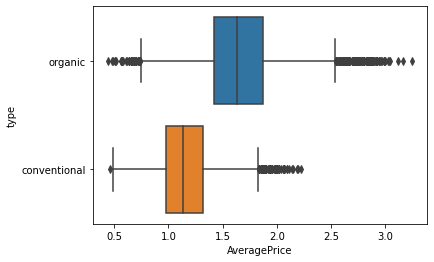

In [15]:
sns.boxplot(y="type", x="AveragePrice", data=avocado_df)

Text(0.5, 0.98, 'Organic Prices by region')

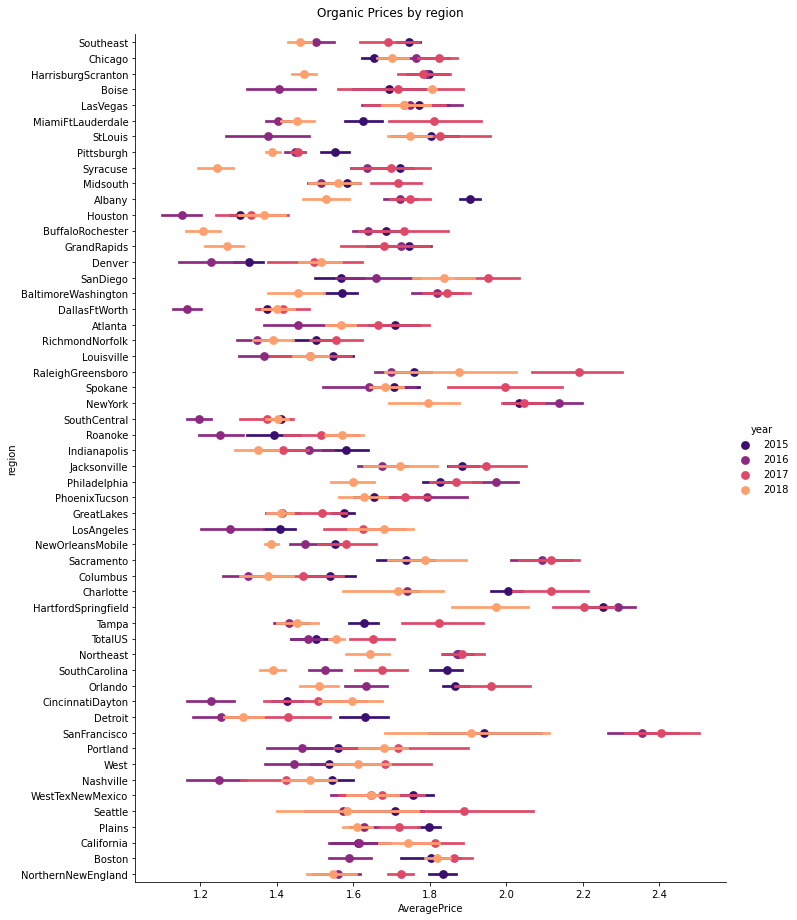

In [16]:
# Check Organic Prices by region
mask = avocado_df['type']=='organic'
g = sns.catplot('AveragePrice','region',data=avocado_df[mask],
                hue='year',
                height=13,
                aspect=0.8,
                palette='magma',
                kind="point",
                join=False
              )
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Organic Prices by region')

Text(0.5, 0.98, 'Conventional Prices by region')

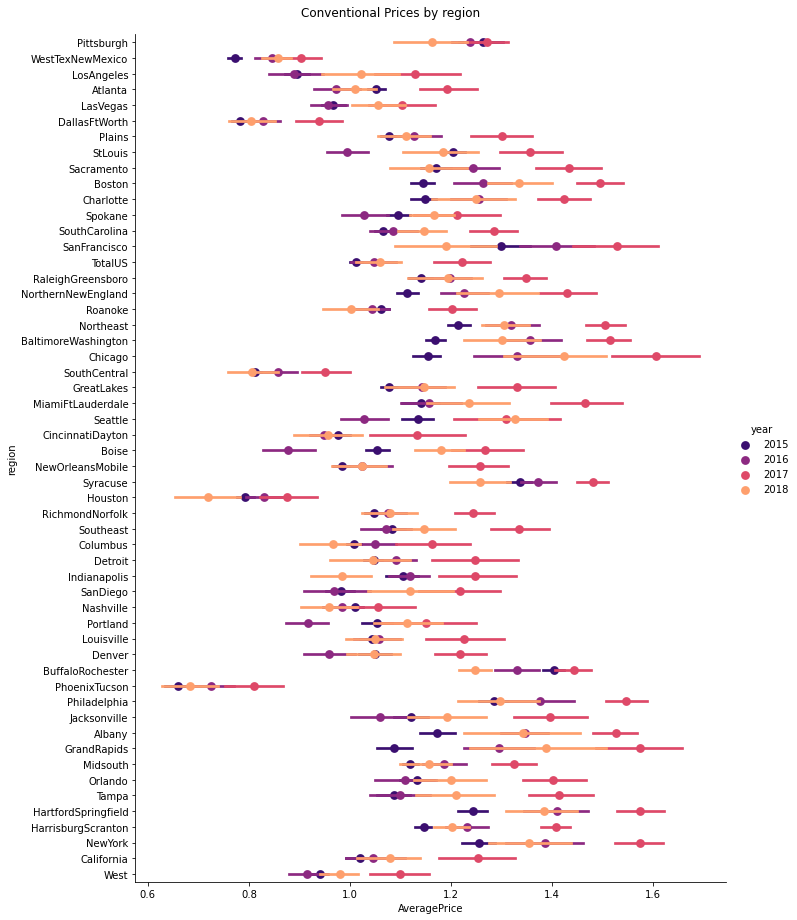

In [17]:
# Check Conventional Prices by region
mask = avocado_df['type']=='conventional'
g = sns.catplot('AveragePrice','region',data=avocado_df[mask],
                hue='year',
                height=13,
                aspect=0.8,
                palette='magma',
                kind="point",
                join=False
              )
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Conventional Prices by region')

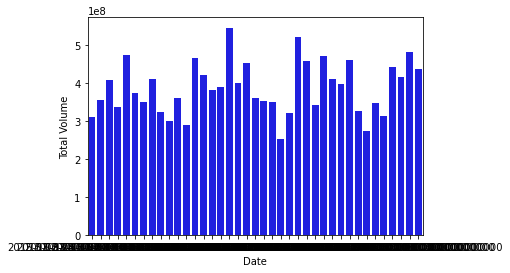

In [18]:
# plot volume
monthly = avocado_df[avocado_df['type']=='conventional'].set_index("Date")
monthly = monthly.resample('M').sum()
sns.barplot(x=monthly.index,y=monthly["Total Volume"], color="b")

# Forecast

In [19]:
avocado_conv = avocado_conv.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_org  = avocado_org.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [20]:
avocado_org

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
9333,2015-01-04,1.64
10269,2015-01-04,1.50
...,...,...
17841,2018-03-25,1.75
18057,2018-03-25,1.42
17649,2018-03-25,1.74
18141,2018-03-25,1.42


In [21]:
m_conv = Prophet()
m_org = Prophet()
m_conv.fit(avocado_conv)
m_org.fit(avocado_org)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# Forcasting into the future
future_conv = m_conv.make_future_dataframe(periods=365)
future_org = m_org.make_future_dataframe(periods=365)
forecast_conv = m_conv.predict(future_conv)
forecast_org = m_org.predict(future_org)

In [23]:
forecast_conv

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.221983,0.845526,1.397578,1.221983,1.221983,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,0.0,0.0,0.0,1.108197
1,2015-01-04,1.221983,0.843561,1.387127,1.221983,1.221983,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,0.0,0.0,0.0,1.108197
2,2015-01-04,1.221983,0.819444,1.383226,1.221983,1.221983,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,0.0,0.0,0.0,1.108197
3,2015-01-04,1.221983,0.835608,1.382215,1.221983,1.221983,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,0.0,0.0,0.0,1.108197
4,2015-01-04,1.221983,0.840268,1.400692,1.221983,1.221983,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,-0.113787,0.0,0.0,0.0,1.108197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9486,2019-03-21,0.910078,0.468908,1.246426,0.643217,1.182239,-0.048837,-0.048837,-0.048837,-0.048837,-0.048837,-0.048837,0.0,0.0,0.0,0.861241
9487,2019-03-22,0.909292,0.455034,1.278729,0.641516,1.182688,-0.047348,-0.047348,-0.047348,-0.047348,-0.047348,-0.047348,0.0,0.0,0.0,0.861944
9488,2019-03-23,0.908506,0.514749,1.256016,0.639866,1.183051,-0.045442,-0.045442,-0.045442,-0.045442,-0.045442,-0.045442,0.0,0.0,0.0,0.863064
9489,2019-03-24,0.907720,0.479358,1.264378,0.638231,1.183415,-0.043144,-0.043144,-0.043144,-0.043144,-0.043144,-0.043144,0.0,0.0,0.0,0.864575


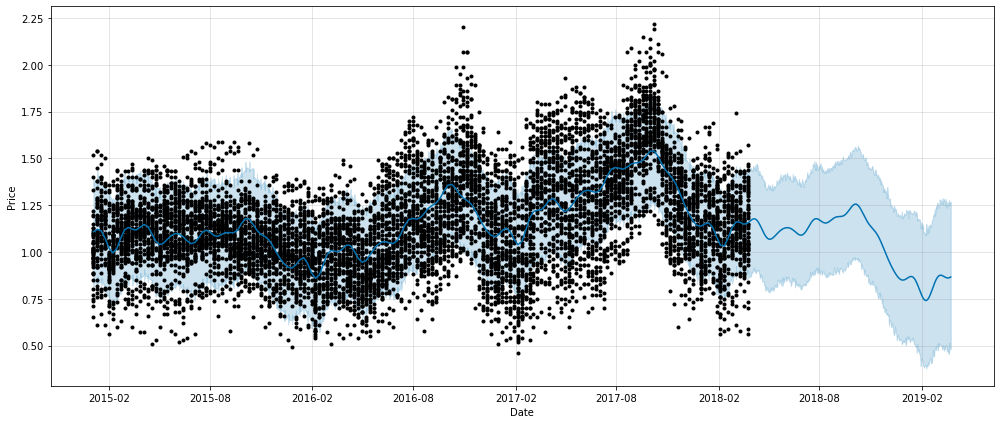

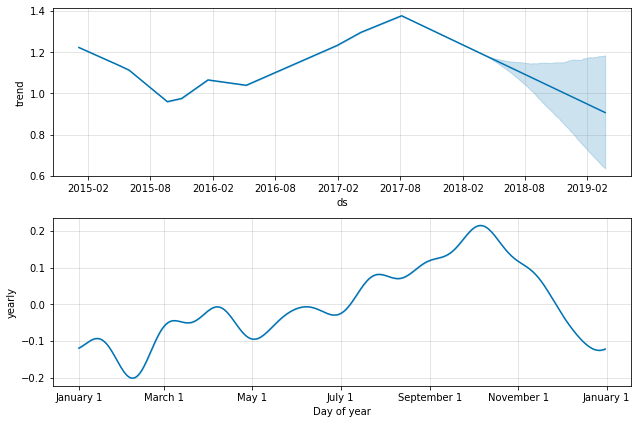

In [24]:
figure_conv = m_conv.plot(forecast_conv, xlabel='Date', ylabel='Price',figsize=(14,6))
figure_conv2 = m_conv.plot_components(forecast_conv)

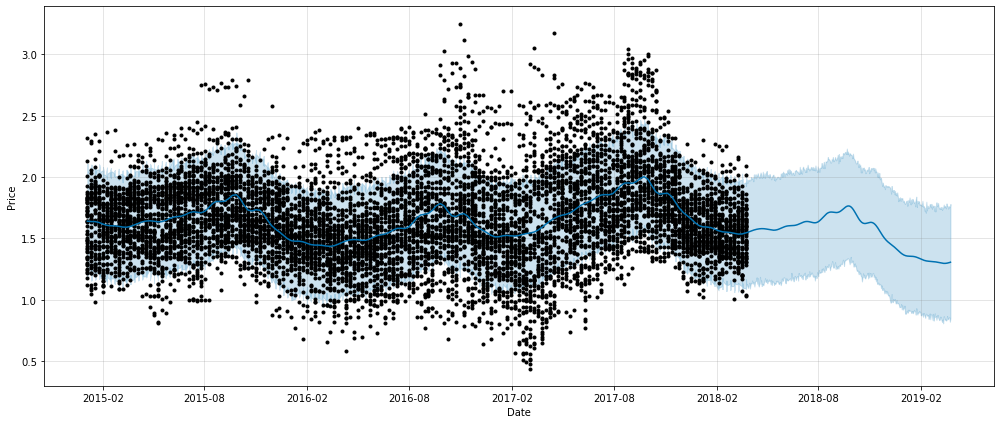

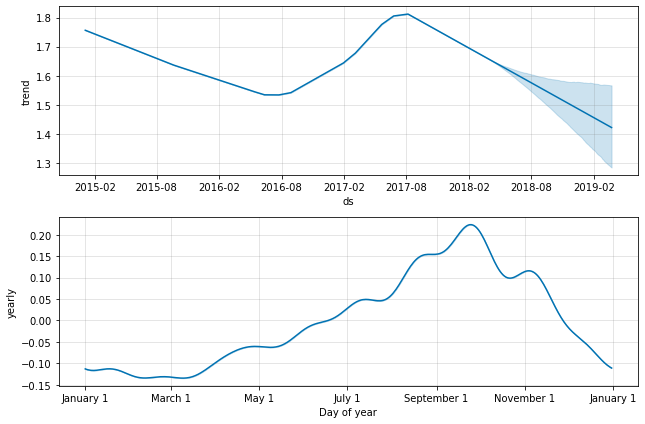

In [25]:
figure_org = m_org.plot(forecast_org, xlabel='Date', ylabel='Price',figsize=(14,6))
figure_org2 = m_org.plot_components(forecast_org)

# PART 2

In [26]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']
# avocado_df_sample = avocado_df_sample.sort_values("Date")

In [27]:
avocado_sample_conv = avocado_df_sample[['Date', 'AveragePrice']][avocado_df_sample['type']=='conventional']
avocado_sample_org = avocado_df_sample[['Date', 'AveragePrice']][avocado_df_sample['type']=='organic']

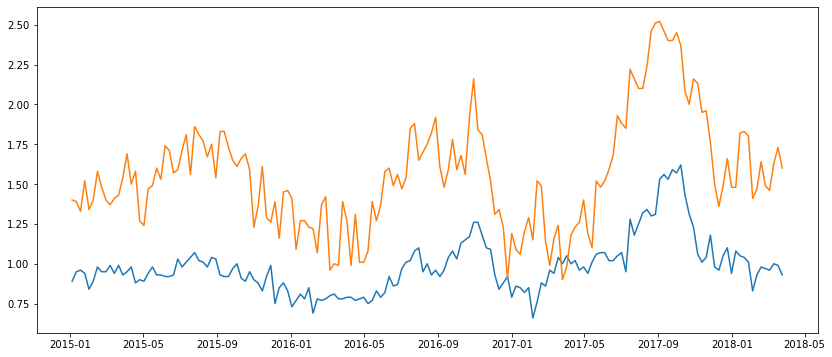

In [28]:
plt.figure(figsize=(14,6))
plt.plot(avocado_sample_conv['Date'], avocado_sample_conv['AveragePrice'])
plt.plot(avocado_sample_org['Date'], avocado_sample_org['AveragePrice'])

In [29]:
avocado_sample_conv = avocado_sample_conv.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_sample_org = avocado_sample_org.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [30]:
m_conv = Prophet()
m_org = Prophet()
m_conv.fit(avocado_sample_conv)
m_org.fit(avocado_sample_org)
# Forcasting into the future
future_conv = m_conv.make_future_dataframe(periods=365)
future_org = m_org.make_future_dataframe(periods=365)
forecast_conv = m_conv.predict(future_conv)
forecast_org = m_org.predict(future_org)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


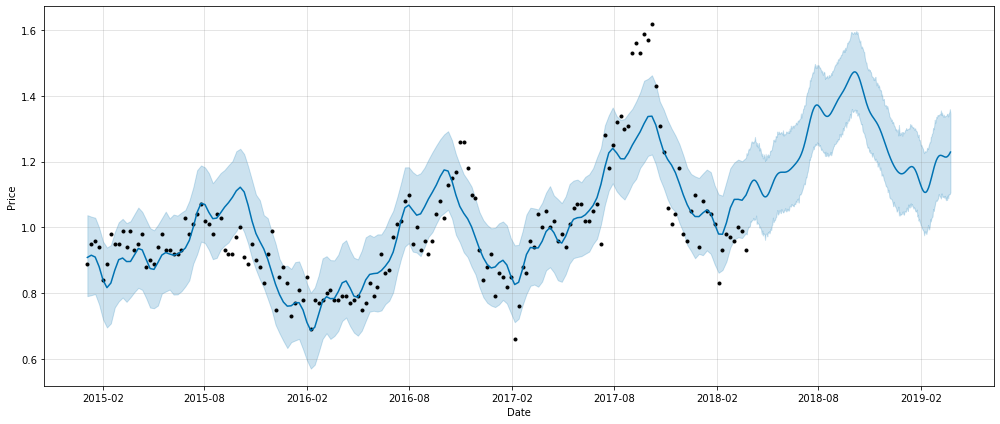

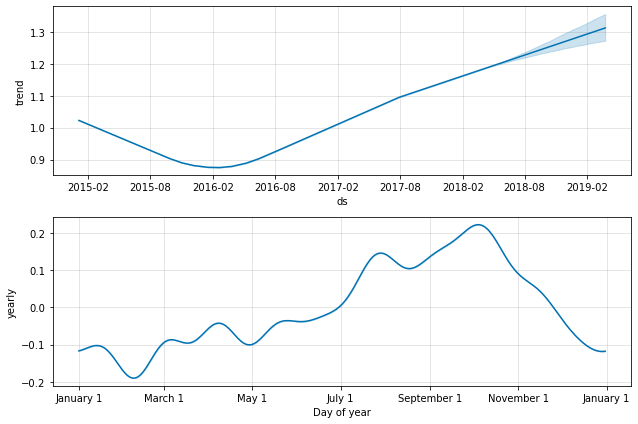

In [31]:
figure_conv = m_conv.plot(forecast_conv, xlabel='Date', ylabel='Price',figsize=(14,6))
figure_conv2 = m_conv.plot_components(forecast_conv)

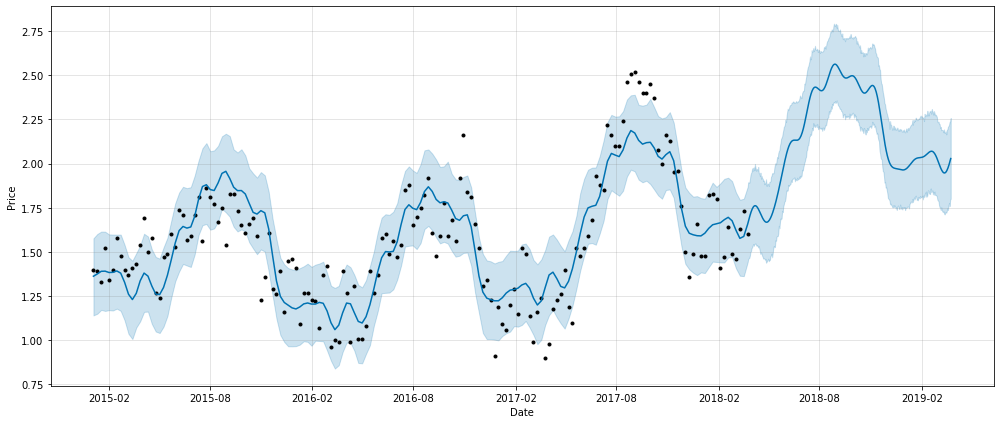

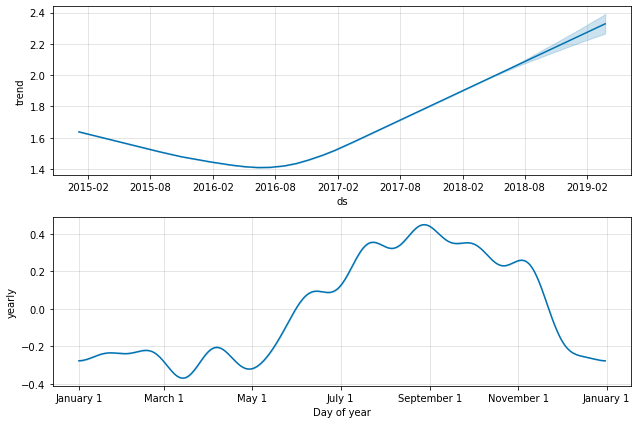

In [32]:
figure_org = m_org.plot(forecast_org, xlabel='Date', ylabel='Price',figsize=(14,6))
figure_org2 = m_org.plot_components(forecast_org)

# The End!